**LEVEL_1 TASK_2**

**CUSTOMER SEGMENTATION ANALYSIS**

IMPORTING LIBRARIES

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [107]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)

DATA LOADING

In [108]:
df = pd.read_csv("ifood_df.csv")

In [109]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())

Shape: (2205, 39)

Columns: ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow', 'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall']


In [110]:
display(df.head())

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

MISSING VALUES

In [112]:
missing = df.isnull().sum()
missing_percent = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Missing_%': missing_percent
}).sort_values(by='Missing_Count', ascending=False)
display(missing_df)

,Missing_Count,Missing_%
Income,0,0.0
Kidhome,0,0.0
Teenhome,0,0.0
Recency,0,0.0
MntWines,0,0.0
MntFruits,0,0.0
MntMeatProducts,0,0.0
MntFishProducts,0,0.0
MntSweetProducts,0,0.0
MntGoldProds,0,0.0


In [113]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
if num_cols:
    print("\nNumeric Columns Summary")
    display(df[num_cols].describe().T)
else:
    print("No numeric columns detected.")


Numeric Columns Summary


,count,mean,std,min,25%,50%,75%,max
Income,2205.0,51622.094785,20713.063826,1730.0,35196.0,51287.0,68281.0,113734.0
Kidhome,2205.0,0.442177,0.537132,0.0,0.0,0.0,1.0,2.0
Teenhome,2205.0,0.506576,0.544380,0.0,0.0,0.0,1.0,2.0
Recency,2205.0,49.009070,28.932111,0.0,24.0,49.0,74.0,99.0
MntWines,2205.0,306.164626,337.493839,0.0,24.0,178.0,507.0,1493.0
MntFruits,2205.0,26.403175,39.784484,0.0,2.0,8.0,33.0,199.0
MntMeatProducts,2205.0,165.312018,217.784507,0.0,16.0,68.0,232.0,1725.0
MntFishProducts,2205.0,37.756463,54.824635,0.0,3.0,12.0,50.0,259.0
MntSweetProducts,2205.0,27.128345,41.130468,0.0,1.0,8.0,34.0,262.0
MntGoldProds,2205.0,44.057143,51.736211,0.0,9.0,25.0,56.0,321.0


In [114]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"\nDetected {len(cat_cols)} categorical/object columns.")
if len(cat_cols) > 0:
    for c in cat_cols[:6]:  # show first 6 categorical columns
        print(f"\nTop Values for Column: {c}")
        print(df[c].value_counts(dropna=False).head(10).to_string())


Detected 0 categorical/object columns.


DUPLICATE ROWS

In [115]:
dup_count = df.duplicated().sum()
print(f"\nDuplicate Rows Count: {dup_count} ")


Duplicate Rows Count: 184 


In [116]:
date_candidates = [c for c in df.columns if 'date' in c.lower() or 'time' in c.lower() or 'timestamp' in c.lower()]
print("\nPotential Date/Time Columns:", date_candidates if date_candidates else "None detected by name")


Potential Date/Time Columns: None detected by name


In [117]:
for c in date_candidates:
    try:
        df[c + "_parsed"] = pd.to_datetime(df[c], errors='coerce')
        print(f"Parsed '{c}' as datetime -> New Column: '{c}_parsed'")
    except Exception as e:
        print(f"Could not parse column '{c}' as datetime: {e}")

In [118]:
print("Dataset Shape:", df.shape)

Dataset Shape: (2205, 39)


In [119]:
print("Numeric Columns Count:", len(num_cols))

Numeric Columns Count: 39


In [120]:
print("Categorical Columns Count:", len(cat_cols))

Categorical Columns Count: 0


In [121]:
print("Duplicate Rows:", dup_count)

Duplicate Rows: 184


In [122]:
print("Potential Date Columns:", date_candidates if date_candidates else "None")

Potential Date Columns: None


In [123]:
print("Missing Values Found:", missing[missing > 0].to_dict() if missing.sum() > 0 else "None")

Missing Values Found: None


HANDLING OUTLIERS

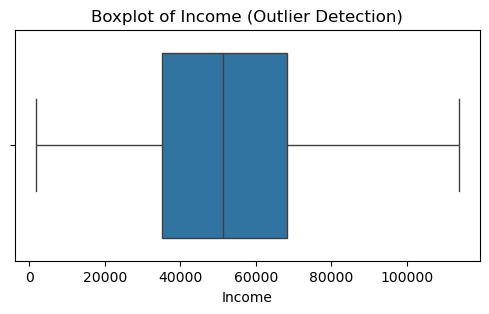

In [124]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df['Income'])
plt.title("Boxplot of Income (Outlier Detection)")
plt.show()

In [125]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [126]:
outliers = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]
print(f"Detected {len(outliers)} outliers in Income column.")

Detected 0 outliers in Income column.


In [127]:
df['Frequency'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
df['Monetary'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [128]:
display(df[['Recency', 'Frequency', 'Monetary']].head())

,Recency,Frequency,Monetary
0,58,22,1617
1,38,4,27
2,26,20,776
3,26,6,53
4,94,14,422


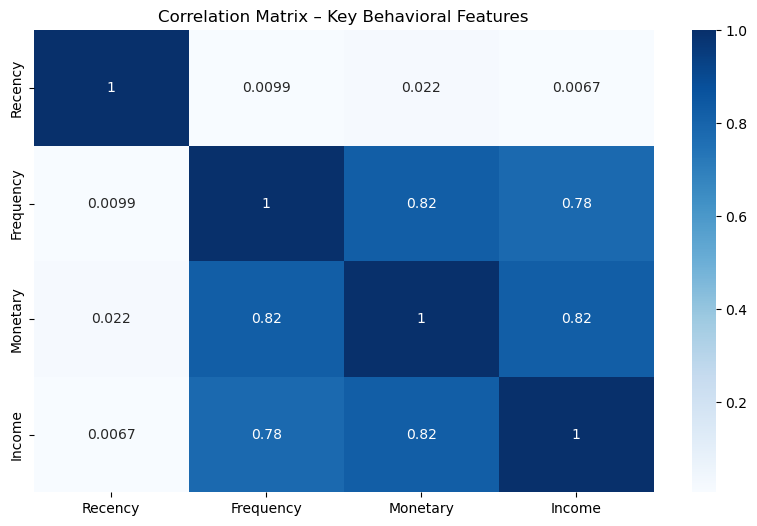

In [129]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['Recency','Frequency','Monetary','Income']].corr(), annot=True, cmap='Blues')
plt.title("Correlation Matrix – Key Behavioral Features")
plt.show()

In [130]:
print("Data Cleaning Summary:")
print("Shape after cleaning:", df.shape)
print("Duplicates removed:", dup_count)
print("Income capped at IQR range.")
print("Added features: 'Frequency' and 'Monetary'")
print("Missing values after cleaning:", df.isnull().sum().sum())

Data Cleaning Summary:
Shape after cleaning: (2205, 41)
Duplicates removed: 184
Income capped at IQR range.
Added features: 'Frequency' and 'Monetary'
Missing values after cleaning: 0


**DESCRIPTIVE STATISTICS**

In [131]:
rfm_cols = ['Recency', 'Frequency', 'Monetary', 'Income']
print("Summary Statistics for Key Customer Metrics")
display(df[rfm_cols].describe().T)

Summary Statistics for Key Customer Metrics


,count,mean,std,min,25%,50%,75%,max
Recency,2205.0,49.009070,28.932111,0.0,24.0,49.0,74.0,99.0
Frequency,2205.0,12.569615,7.180350,0.0,6.0,12.0,18.0,32.0
Monetary,2205.0,606.821769,601.675284,5.0,69.0,397.0,1047.0,2525.0
Income,2205.0,51622.094785,20713.063826,1730.0,35196.0,51287.0,68281.0,113734.0


DISTRIBUTION PLOTS

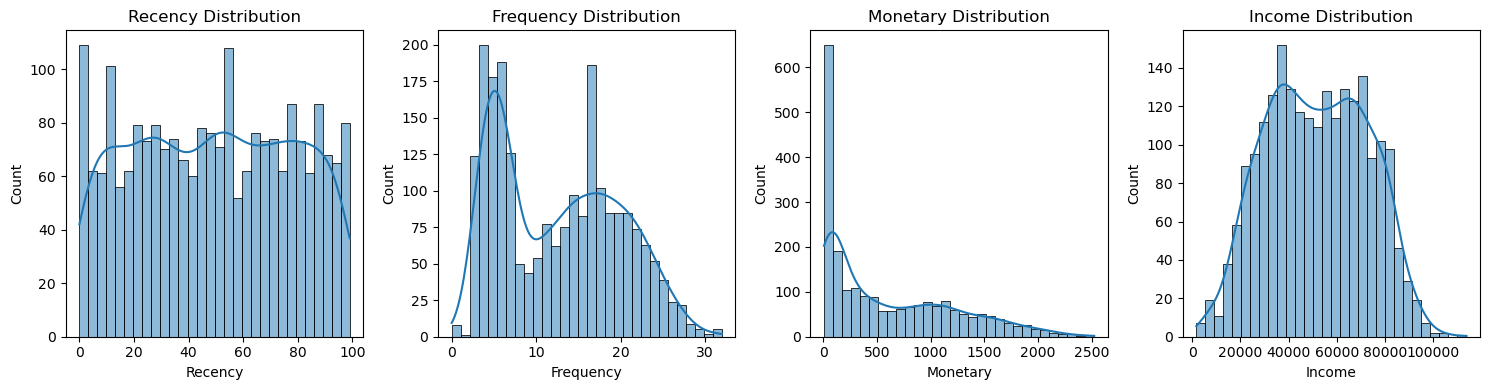

In [132]:
plt.figure(figsize=(15,4))
for i, col in enumerate(rfm_cols):
    plt.subplot(1, 4, i+1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"{col} Distribution")
plt.tight_layout()
plt.show()

OUTLIER VISUALIZATION

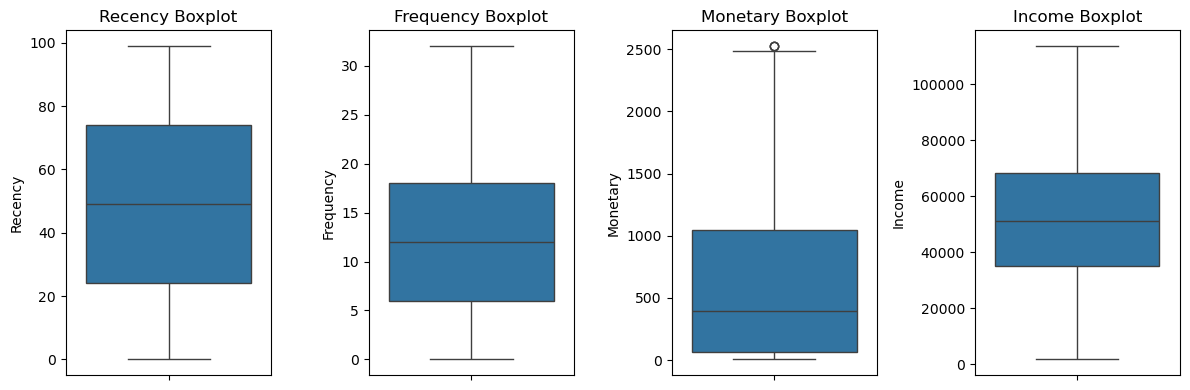

In [133]:
plt.figure(figsize=(12,4))
for i, col in enumerate(rfm_cols):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(f"{col} Boxplot")
plt.tight_layout()
plt.show()

FEATURE RELATIONSHIP

In [134]:
avg_income = df['Income'].mean()
avg_monetary = df['Monetary'].mean()
avg_frequency = df['Frequency'].mean()
avg_recency = df['Recency'].mean()

In [135]:
print(f"• Average Income: {avg_income:,.0f}")
print(f"• Average Monetary Value (spend): {avg_monetary:,.0f}")
print(f"• Average Purchase Frequency: {avg_frequency:.2f}")
print(f"• Average Recency (days since last purchase): {avg_recency:.2f}")

• Average Income: 51,622
• Average Monetary Value (spend): 607
• Average Purchase Frequency: 12.57
• Average Recency (days since last purchase): 49.01


**CUSTOMER SEGMENTATION USING K-MEANS CLUSTERING**

FEATURE SELECTION FOR CLUSTERING

In [136]:
features = ['Recency', 'Frequency', 'Monetary', 'Income']
X = df[features].copy()

FEATURE SCALING

In [137]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

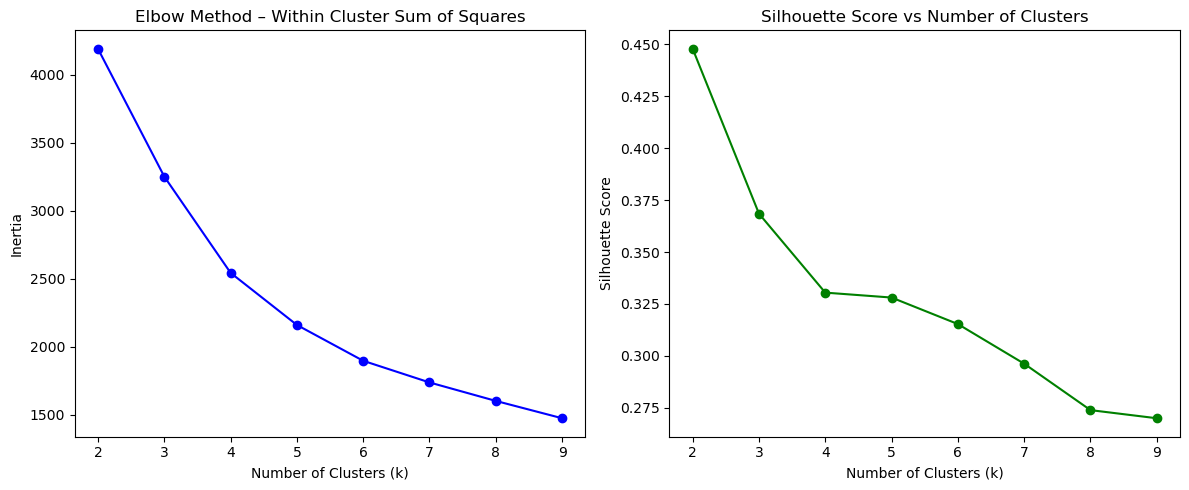

In [138]:
inertia = []
silhouette = []

K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K_range, inertia, 'o-', color='blue')
plt.title('Elbow Method – Within Cluster Sum of Squares')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1,2,2)
plt.plot(K_range, silhouette, 'o-', color='green')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [139]:
optimal_k = 4  
print(f"Using k = {optimal_k} for clustering")

Using k = 4 for clustering


In [140]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [141]:
cluster_summary = df.groupby('Cluster')[features].agg(['mean','median','count']).round(2)
print("### Cluster Summary (mean/median/count) ###")
display(cluster_summary)

### Cluster Summary (mean/median/count) ###


Recency              Frequency              Monetary                  Income               
           mean median count      mean median count     mean  median count      mean   median count
Cluster                                                                                            
0         23.27   24.0   465     19.56   19.0   465  1177.68  1117.0   465  70866.29  70440.0   465
1         22.90   23.0   596      7.10    6.0   596   149.28    77.5   596  36326.74  36345.5   596
2         73.21   74.0   609      6.89    6.0   609   138.50    78.0   609  36327.71  36921.0   609
3         72.93   72.0   535     19.05   19.0   535  1153.46  1101.0   535  69345.01  69016.0   535

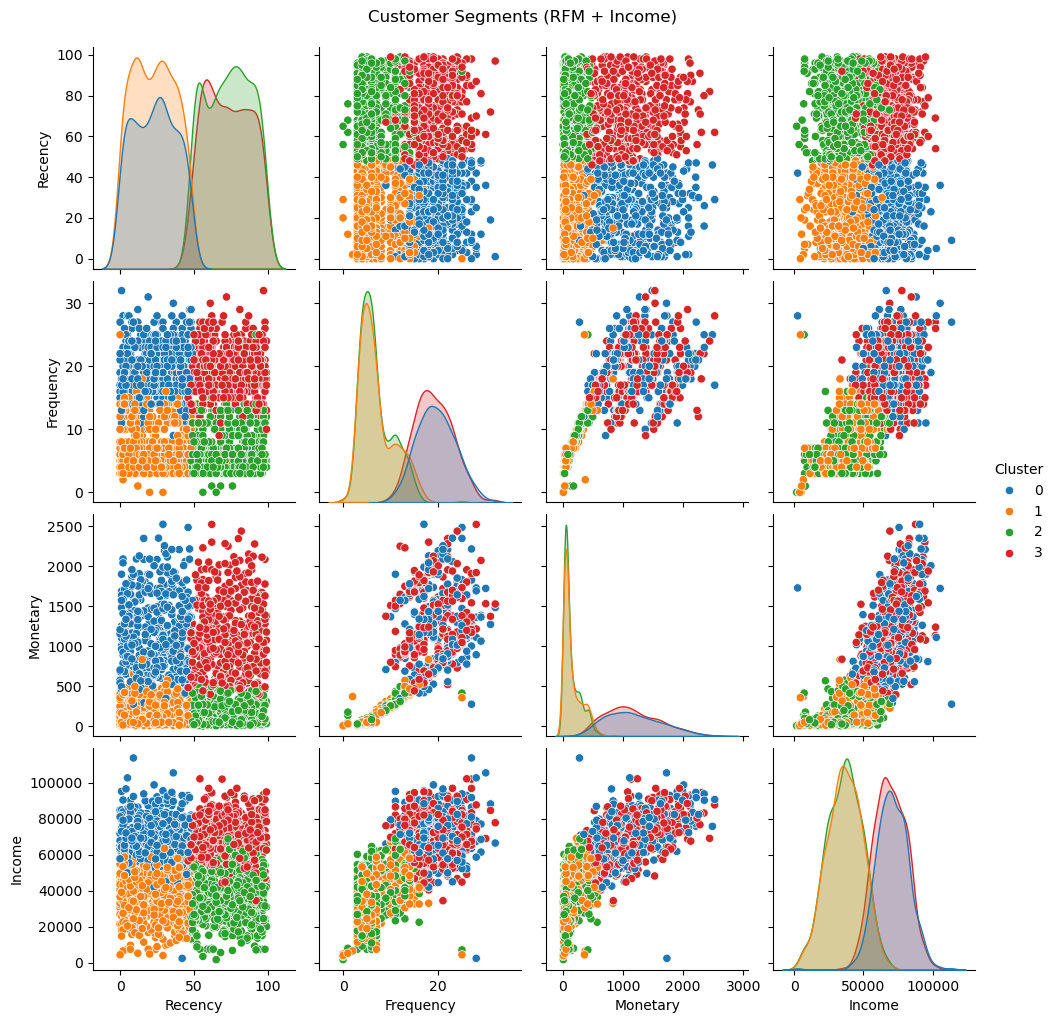

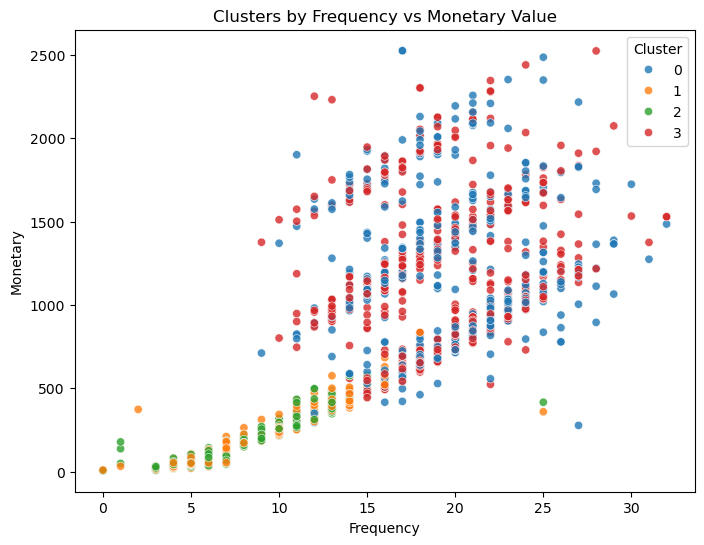

In [142]:
sns.pairplot(df, vars=features, hue='Cluster', palette='tab10', diag_kind='kde')
plt.suptitle("Customer Segments (RFM + Income)", y=1.02)
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x='Frequency', y='Monetary', hue='Cluster', data=df, palette='tab10', alpha=0.8)
plt.title('Clusters by Frequency vs Monetary Value')
plt.show()

**VISUALIZATIONS**

In [143]:
profile = df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary', 'Income']].mean().round(2)
profile['Count'] = df['Cluster'].value_counts().sort_index()
profile['% of Customers'] = (profile['Count'] / len(df) * 100).round(2)
display(profile)

,Recency,Frequency,Monetary,Income,Count,% of Customers
Cluster,,,,,,
0,23.27,19.56,1177.68,70866.29,465,21.09
1,22.90,7.10,149.28,36326.74,596,27.03
2,73.21,6.89,138.50,36327.71,609,27.62
3,72.93,19.05,1153.46,69345.01,535,24.26


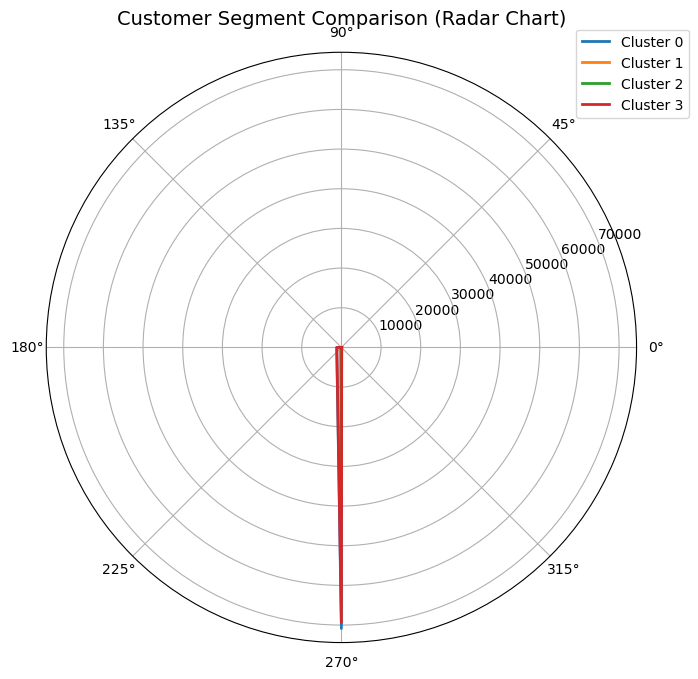

In [144]:
from math import pi

categories = ['Recency', 'Frequency', 'Monetary', 'Income']
N = len(categories)

plt.figure(figsize=(7,7))
for cluster_id in profile.index:
    values = profile.loc[cluster_id, categories].values.flatten().tolist()
    values += values[:1]  # repeat first value to close the circle
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    plt.polar(angles, values, label=f'Cluster {cluster_id}', linewidth=2)

plt.title("Customer Segment Comparison (Radar Chart)", size=14, pad=20)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.tight_layout()
plt.show()


<Axes: xlabel='Metric', ylabel='Value'>

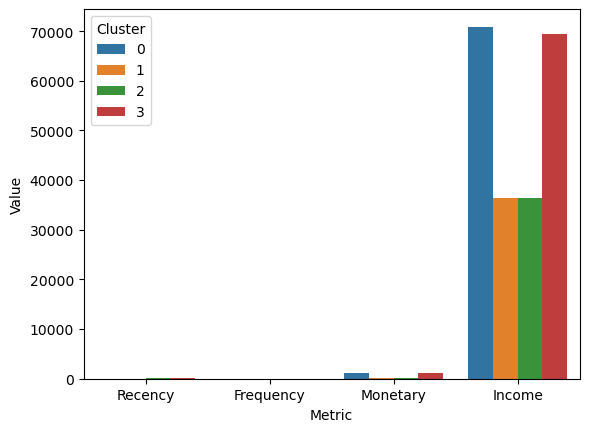

In [145]:
sns.barplot(
    data=melted,
    x='Metric',
    y='Value',
    hue='Cluster',
    errorbar=('ci', False),   
    palette='tab10'
)


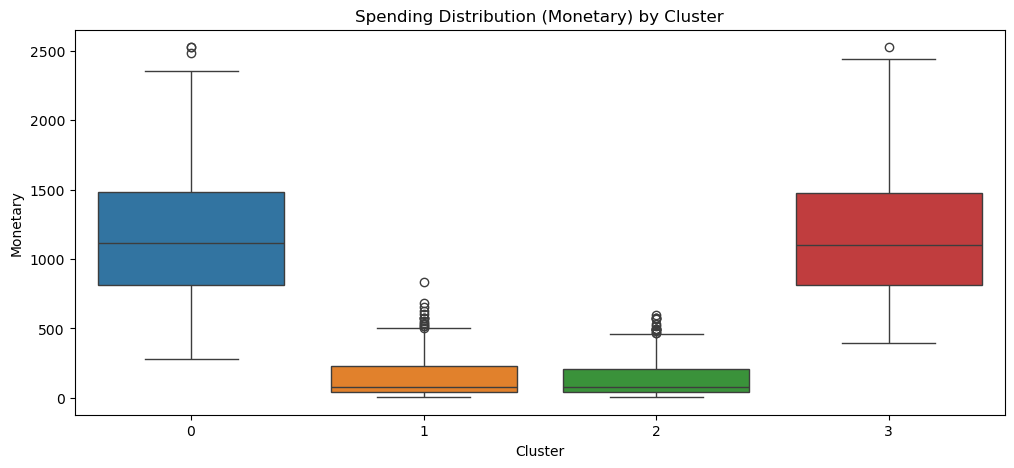

In [146]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Cluster', y='Monetary', hue='Cluster', data=df, palette='tab10', legend=False)
plt.title("Spending Distribution (Monetary) by Cluster")
plt.show()


**INSIGHTS**

In [147]:
print("High-Level Segment Insights")

for c in sorted(df['Cluster'].unique()):
    temp = df[df['Cluster'] == c]
    print(f"\nCluster {c}:")
    print(f"• Size: {len(temp)} customers ({len(temp)/len(df)*100:.1f}% of total)")
    print(f"• Avg Recency: {temp['Recency'].mean():.1f}")
    print(f"• Avg Frequency: {temp['Frequency'].mean():.1f}")
    print(f"• Avg Monetary: {temp['Monetary'].mean():,.1f}")
    print(f"• Avg Income: {temp['Income'].mean():,.0f}")
    print("---------------------------------------------------")

print("\nInterpretation Tips:")
print("➡ Cluster with low Recency = recent buyers (high engagement).")
print("➡ High Frequency + High Monetary = loyal high-value customers.")
print("➡ Low Frequency + High Recency = churn risk.")
print("➡ Combine insights with marketing strategies (e.g., retention, upsell, reactivation).")

High-Level Segment Insights

Cluster 0:
• Size: 465 customers (21.1% of total)
• Avg Recency: 23.3
• Avg Frequency: 19.6
• Avg Monetary: 1,177.7
• Avg Income: 70,866
---------------------------------------------------

Cluster 1:
• Size: 596 customers (27.0% of total)
• Avg Recency: 22.9
• Avg Frequency: 7.1
• Avg Monetary: 149.3
• Avg Income: 36,327
---------------------------------------------------

Cluster 2:
• Size: 609 customers (27.6% of total)
• Avg Recency: 73.2
• Avg Frequency: 6.9
• Avg Monetary: 138.5
• Avg Income: 36,328
---------------------------------------------------

Cluster 3:
• Size: 535 customers (24.3% of total)
• Avg Recency: 72.9
• Avg Frequency: 19.1
• Avg Monetary: 1,153.5
• Avg Income: 69,345
---------------------------------------------------

Interpretation Tips:
➡ Cluster with low Recency = recent buyers (high engagement).
➡ High Frequency + High Monetary = loyal high-value customers.
➡ Low Frequency + High Recency = churn risk.
➡ Combine insights with ma

In [148]:

profile_summary = df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary', 'Income']].mean().round(2)
profile_summary['Customer_Count'] = df['Cluster'].value_counts().sort_index()
profile_summary['%_of_Customers'] = (profile_summary['Customer_Count'] / len(df) * 100).round(2)
display(profile_summary)

,Recency,Frequency,Monetary,Income,Customer_Count,%_of_Customers
Cluster,,,,,,
0,23.27,19.56,1177.68,70866.29,465,21.09
1,22.90,7.10,149.28,36326.74,596,27.03
2,73.21,6.89,138.50,36327.71,609,27.62
3,72.93,19.05,1153.46,69345.01,535,24.26


**RECOMMENDATIONS**

Overall Strategic Recommendations

**1.Loyal/High-Value Segment:**
   - Reward loyalty with exclusive deals or early product access.
   - Introduce referral or VIP programs to increase retention.
     
**2.Dormant/Inactive Segment:**
   - Use reactivation campaigns (emails, discounts).
   - Analyze why churn happened — pricing, product range, etc.
     
**3.High-Income but Low-Spend Segment:**
   - Offer premium product bundles or personalized recommendations.
   - Use cross-selling techniques to increase spend per purchase.
     
**4.Low-Value Segment:**
   - Limit marketing costs, automate communication.
   - Use targeted ads only when ROI is justified.